In [9]:
import quimb.tensor as qtn
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
N = 6
circ = qtn.Circuit(N)

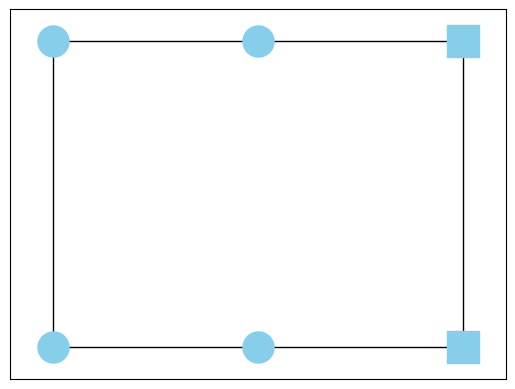

In [11]:
# Make the graph of the qubits
edges = [(0, 1), (1, 2), (3, 4), (4, 5), (0, 3), (2, 5)]
G = nx.Graph(edges)

# Position the nodes
pos = {
    0: (0, 0),
    1: (1, 0),
    2: (2, 0),
    3: (0, -1),
    4: (1, -1),
    5: (2, -1)
}

# Draw the graph
subset_b = [2, 5]
subset_c = [0, 1, 3, 4]
nx.draw_networkx_nodes(G, pos, nodelist=subset_b, node_shape='s', node_color='skyblue', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=subset_c, node_shape='o', node_color='skyblue', node_size=500)

# Draw edges and labels (optional)
nx.draw_networkx_edges(G, pos)
#nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=500)

# Display the plot
plt.show()

In [3]:
def brickwork_state_init(qtm_circ):
    # hamadard on all of the qubits
    for i in [1, 2, 4, 5]:
        qtm_circ.apply_gate('H', i)
        #print(np.round(circ.psi.to_qarray(), 10))
    # create the entanglement for the brickwork state
    circ.apply_gate('CZ', 0, 1)
    circ.apply_gate('CZ', 3, 4)
    circ.apply_gate('CZ', 1, 2)
    circ.apply_gate('CZ', 4, 5)
    circ.apply_gate('CZ', 0, 3)
    circ.apply_gate('CZ', 2, 5)
    return qtm_circ


In [4]:
#circ.apply_gate('X',0)
circ.apply_gate('X',3)

# initiate brickwork state
circ = brickwork_state_init(circ)

In [5]:
# Build the projector on the plus state to deterministically "simulate" measurement of the plus state 

hadamard_zeroket_zerobra_hadamard = np.matmul(np.matmul(np.array([[1, 1], [1,-1]]), np.array([[1, 0], [0,0]])), np.array([[1, 1], [1,-1]]))
proj = 1/2 * hadamard_zeroket_zerobra_hadamard

def rotation_z_gate(theta):
    rot_z = np.array([[np.exp(-1j*theta), 0],[0, np.exp(1j*theta)]])
    return rot_z

def z_rot_proj_meas(qubit, theta, qtm_circ):
    # Rotate qubit to be measured
    z_rot = rotation_z_gate(theta)
    qtm_circ.apply_gate(z_rot, qubit)
    
    # Apply the "measurement" projector
    qtm_circ.apply_gate(proj, qubit)

    # Reormalize the state
    state_vector = np.round(qtm_circ.psi.to_qarray(), 10)
    ## Compute renormalization factor from the norm of the vector after projective measurement
    renorm_factor = np.sqrt(np.dot(state_vector.conj().T, state_vector))
    ## Apply renormalization with identity matrix on measured qubit
    renorm_matrix = np.array([[1, 0], [0, 1]])* 1/renorm_factor
    qtm_circ.apply_gate(renorm_matrix, qubit)



In [6]:
for qubit in [0, 3]:
    z_rot_proj_meas(qubit, 0, circ)
for qubit in [1, 4]:
    z_rot_proj_meas(qubit, 0, circ)

In [7]:
circ.apply_gate('H', 0)
circ.apply_gate('H', 3)
circ.apply_gate('H', 1)
circ.apply_gate('H', 4)

list = np.nonzero(np.round(circ.psi.to_qarray(), 10))
sv =np.round(circ.psi.to_qarray(), 10) #np.round(np.exp(-1j * np.pi/2)*circ.psi.to_qarray(), 10)
print(list[0], len(sv))
for i in list[0]:
    print(sv[i])


[1] 64
[1.+0.j]
